In [49]:
print('hello')

hello


Print Hello world in python


In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Display the first 5 rows of the dataframe
df.head()

# Get a concise summary of the dataframe
# This will show us data types and non-null (non-missing) counts.
df.info()

print("\n-------------------\n")

# Get a statistical summary of the numerical columns
df.describe()

# --- Handle Missing Values ---

# Fill missing 'age' values with the median age.
# The median is better than the mean here because it's robust to outliers.
df['age'].fillna(df['age'].median(), inplace=True)

# Drop the 'deck' column because it has too many missing values.
df.drop('deck', axis=1, inplace=True)

# Fill the two missing 'embarked' values with the most common port.
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


# --- Convert Categorical Features ---

# Convert 'sex' and 'embarked' columns into numerical format using one-hot encoding.
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)


# --- Final Feature Selection ---

# Drop columns that are not useful for prediction
df.drop(['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1, inplace=True)

# Display the first 5 rows of our cleaned dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

-------------------



/tmp/ipython-input-2587407805.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-2587407805.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Task
Load the dataframe from the file `/content/drive/MyDrive/data.csv`.

## Mount google drive

### Subtask:
Connect your Google Drive to the Colab environment.


**Reasoning**:
The subtask is to connect Google Drive to the Colab environment. This requires importing the `drive` module and mounting the drive.



In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data

### Subtask:
Load the data from the specified file path into a pandas DataFrame.


**Reasoning**:
Load the data from the specified file path into a pandas DataFrame and handle potential file not found errors.



In [52]:
file_path = '/content/drive/MyDrive/data.csv'
try:
    df_loaded = pd.read_csv(file_path)
    display(df_loaded.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Error: The file was not found at /content/drive/MyDrive/data.csv


## List files (optional)

### Subtask:
Display the files in your Drive to find the path to your data file.


**Reasoning**:
Use the os module to list the contents of the MyDrive directory to find the data file.



In [53]:
import os

# List the contents of the MyDrive directory
try:
    files_in_drive = os.listdir('/content/drive/MyDrive/Colab Notebooks/ColabPrj')
    print("Files in MyDrive:")
    for file in files_in_drive:
        print(file)
except FileNotFoundError:
    print("Error: The directory '/content/drive/MyDrive/Colab Notebooks/ColabPrj' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Files in MyDrive:
data.csv


## Load data

### Subtask:
Retry loading the data from the specified file path into a pandas DataFrame.


**Reasoning**:
Retry loading the data from the specified file path using a try-except block as requested in the instructions, and display the head if successful.



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB

-------------------



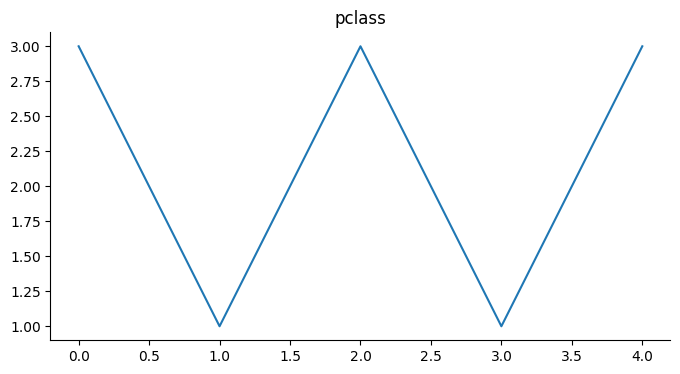

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/ColabPrj/data.csv'
try:
    df_loaded = pd.read_csv(file_path , sep='\t')
    display(df_loaded.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")
# Display the first 5 rows of the dataframe
df.head()

# Get a concise summary of the dataframe
# This will show us data types and non-null (non-missing) counts.
df.info()

print("\n-------------------\n")
# Get a statistical summary of the numerical columns
df.describe()

from matplotlib import pyplot as plt
_df_17['pclass'].plot(kind='line', figsize=(8, 4), title='pclass')
plt.gca().spines[['top', 'right']].set_visible(False)



Split Data


In [55]:
from sklearn.model_selection import train_test_split

# Define our features (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (712, 8)
Testing data shape: (179, 8)


Model Building and Evaluation

In [56]:
# Import the model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
log_model = LogisticRegression(max_iter=1000) # max_iter helps the model converge

# Train the model on the training data
log_model.fit(X_train, y_train)

# Make predictions on the test data
log_predictions = log_model.predict(X_test)

# Evaluate the model's accuracy
log_accuracy = accuracy_score(y_test, log_predictions)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")

# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_predictions))

Logistic Regression Accuracy: 0.8101

Confusion Matrix:
[[90 15]
 [19 55]]


Train a More Advanced Model (Random Forest)

In [57]:
# Import the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Show the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Accuracy: 0.8212

Confusion Matrix:
[[91 14]
 [18 56]]


Save the Trained Model

In [58]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'titanic_rf_model.joblib')

print("Model saved successfully!")

Model saved successfully!


 Load and Test the Saved Model

In [59]:
# Load the model from the file
loaded_model = joblib.load('titanic_rf_model.joblib')

# Get the data for the first passenger in the test set
first_passenger = X_test.iloc[[0]]

# Use the loaded model to make a prediction
prediction = loaded_model.predict(first_passenger)

# Print the result
if prediction[0] == 1:
    print("Prediction for the first passenger: Survived")
else:
    print("Prediction for the first passenger: Did not survive")

Prediction for the first passenger: Did not survive


##Data Prep in Seaborn :<br>
  iris ,   tips<br>  flights<br>  penguins<br>  diamonds<br>  fmri<br>

In [60]:
import seaborn as sns

# Load the 'tips' dataset into a pandas DataFrame
tips_df = sns.load_dataset('taxis')
# Load the taxis dataset
taxis_df = sns.load_dataset('taxis')

# Check its shape
print(f"The taxis dataset has {taxis_df.shape[0]} rows.")


print(taxis_df.head())

# Display the first 5 rows
print(tips_df.head())

The taxis dataset has 6433 rows.
               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan

## Data Prep on Github
### Load CSV from URL
import pandas as pd

# 1. Define the raw GitHub URL
# Replace this with the raw URL of your own CSV file
raw_url = 'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'

# 2. Use pandas to read the CSV file directly from the URL
try:
    df = pd.read_csv(raw_url)
    
    # 3. Display the first 5 rows of the DataFrame to confirm it loaded correctly
    print("CSV file loaded successfully!")
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")

In [61]:
import pandas as pd

# 1. Define the raw GitHub URL
# Replace this with the raw URL of your own CSV file
# raw_url =  'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'
raw_url =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# 2. Use pandas to read the CSV file directly from the URL
try:
    df = pd.read_csv(raw_url)

    # 3. Display the first 5 rows of the DataFrame to confirm it loaded correctly
    print("CSV file loaded successfully!")
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23 

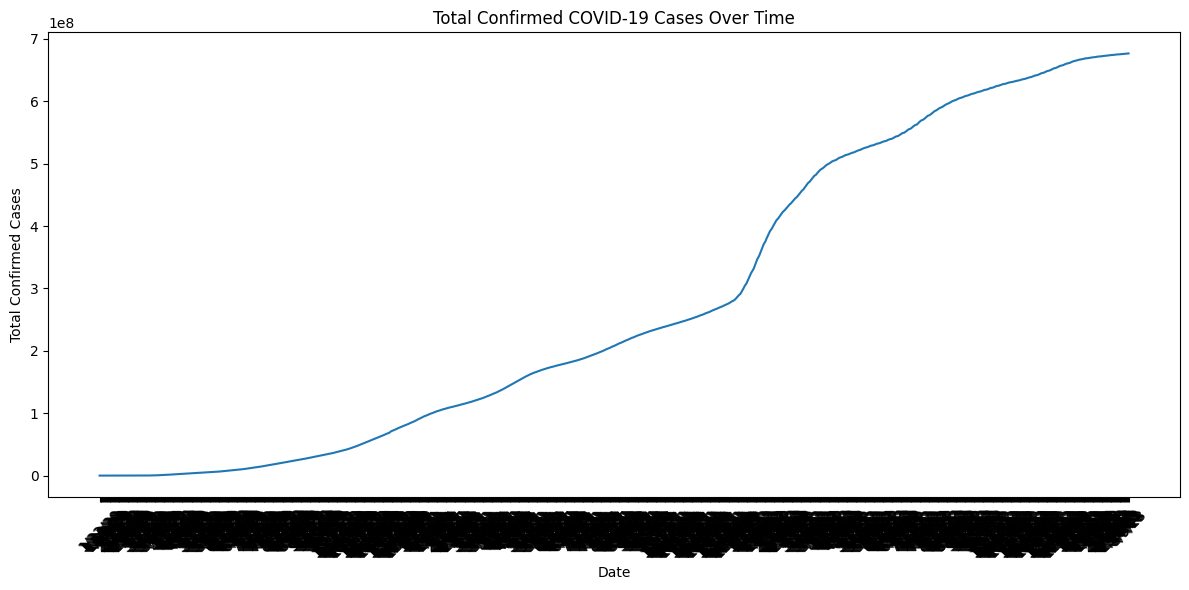

In [62]:
# Identify date columns (those starting from '1/22/20')
date_cols = df.columns[4:]

# Sum confirmed cases across all regions for each date
total_confirmed = df[date_cols].sum()

# Create a line chart of total confirmed cases over time
plt.figure(figsize=(12, 6))
plt.plot(total_confirmed.index, total_confirmed.values)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
# Install the prophet library
!pip install prophet


# Import the necessary libraries
import pandas as pd
from prophet import Prophet
# --- IMPORTANT: Load Your Data Here ---
# I will create a sample DataFrame that looks like yours.
# Replace this part with your own code to load your CSV.
# For example: df = pd.read_csv('your_covid_data.csv')

# Sample data creation (REPLACE THIS)
dates = pd.to_datetime(pd.date_range(start='2020-03-01', end='2022-09-01'))
# A logistic function to mimic the S-curve of total cases
total_cases = (7e7 / (1 + np.exp(-0.01 * (np.arange(len(dates)) - 300)))) + np.random.rand(len(dates))*1e6
df = pd.DataFrame({'date': dates, 'total_cases': total_cases})
# --- End of Sample Data ---


# Ensure your 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# 1. Calculate Daily New Cases (CRUCIAL STEP)
# This finds the difference between a day and the day before it.
df['new_cases'] = df['total_cases'].diff().fillna(0)
# We remove any negative values that might appear from data corrections
df.loc[df['new_cases'] < 0, 'new_cases'] = 0

# 2. Format the DataFrame for Prophet
# Prophet requires the columns to be named 'ds' (datestamp) and 'y' (value to predict).
df_prophet = df[['date', 'new_cases']].rename(columns={'date': 'ds', 'new_cases': 'y'})

print("Data prepared for Prophet:")
print(df_prophet.head())

Data prepared for Prophet:
          ds              y
0 2020-03-01       0.000000
1 2020-03-02  328227.258645
2 2020-03-03       0.000000
3 2020-03-04  387017.501235
4 2020-03-05       0.000000


# Initialize the Prophet model
# We can add seasonality parameters to help the model.
model = Prophet(daily_seasonality=True, weekly_seasonality=True)

# Train the model on our data
model.fit(df_prophet)

In [64]:

# Initialize the Prophet model
# We can add seasonality parameters to help the model.
model = Prophet(daily_seasonality=True, weekly_seasonality=True)

# Train the model on our data
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp097roudh/rs9h1ch4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp097roudh/s0nzdwzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15748', 'data', 'file=/tmp/tmp097roudh/rs9h1ch4.json', 'init=/tmp/tmp097roudh/s0nzdwzo.json', 'output', 'file=/tmp/tmp097roudh/prophet_model71otgz4p/prophet_model-20251012174511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:45:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📈 Step 4: Make a Future Forecast
With our trained model, we can now create a DataFrame for future dates and ask the model to predict the values.

In [65]:
# Create a DataFrame for future dates (e.g., the next 90 days)
future = model.make_future_dataframe(periods=90)

# Use the model to make a forecast
forecast = model.predict(future)

# Display the last few rows of the forecast
# 'yhat' is the prediction
# 'yhat_lower' and 'yhat_upper' are the uncertainty intervals
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds           yhat     yhat_lower     yhat_upper
1000 2022-11-26  181525.420823 -162811.563190  541793.687038
1001 2022-11-27  219514.329889 -134015.082258  524886.492679
1002 2022-11-28  188911.855006 -152927.759399  518844.427135
1003 2022-11-29  164709.501622 -165098.352652  502044.401320
1004 2022-11-30  207278.212031 -138600.962895  548359.950155


🎨 Step 5: Visualize the Results
Prophet has powerful and easy-to-use plotting functions to help you visualize the forecast.

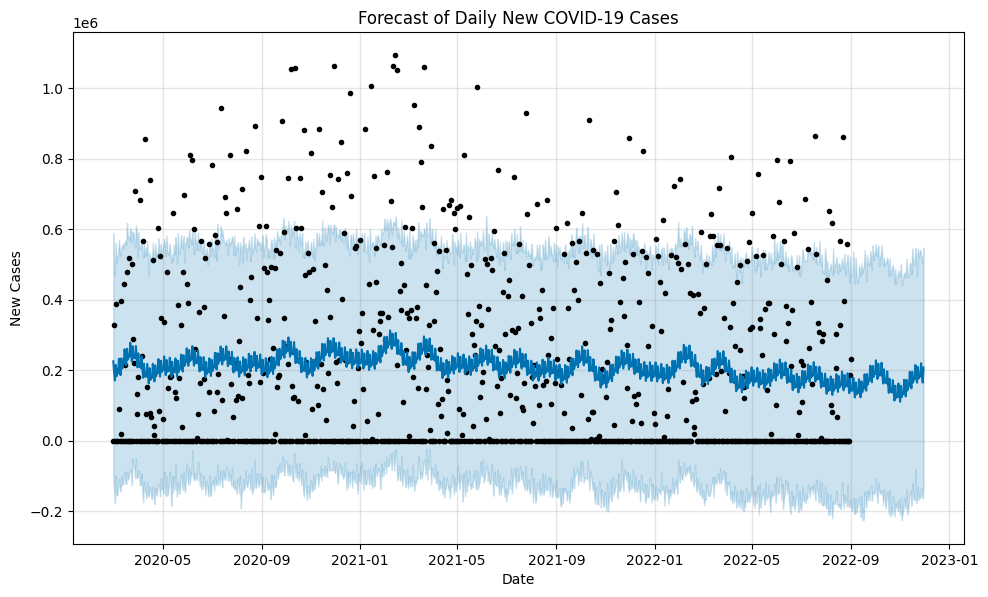

In [66]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Forecast of Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

Plot 2: Forecast Components

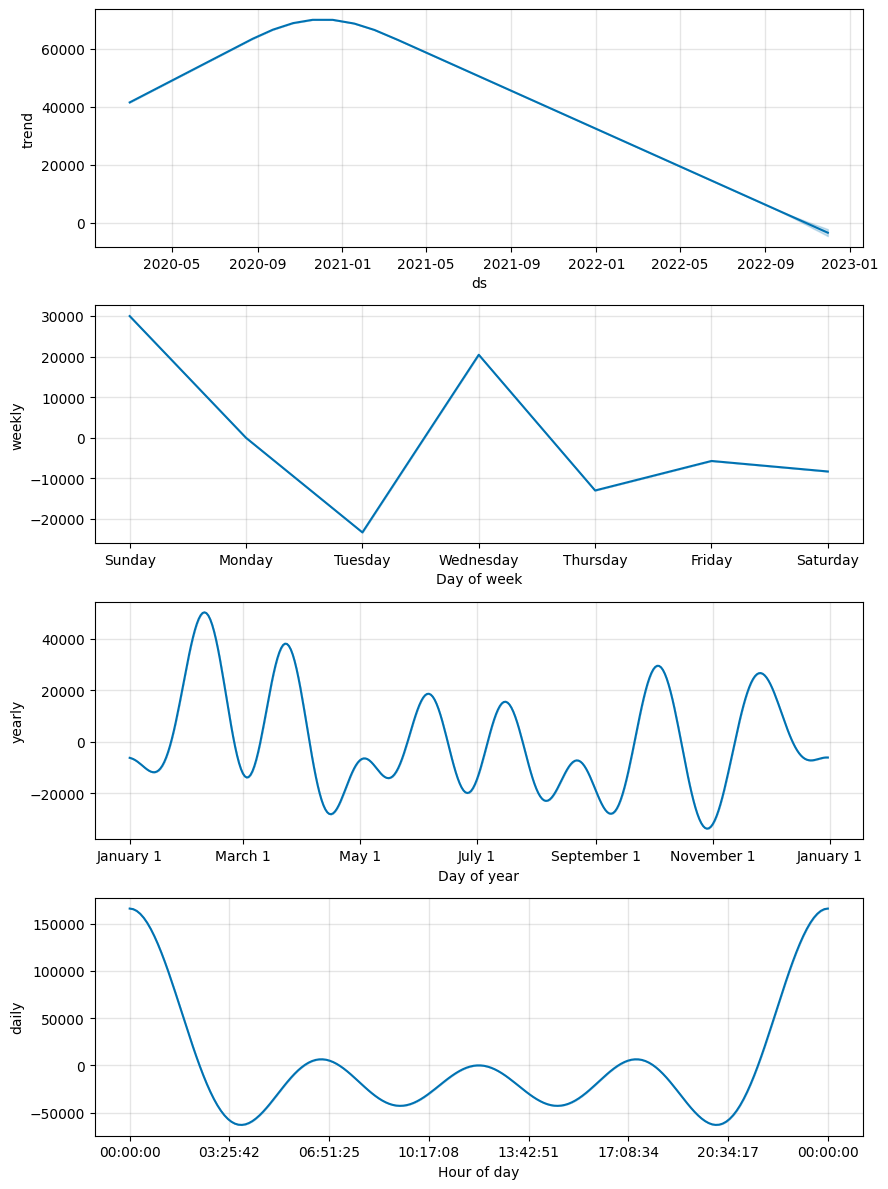

In [67]:
# Plot the forecast components (trend, weekly/yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

Python Code for Calculation MR 💻

In [68]:
import pandas as pd

# --- Create a Sample DataFrame ---
# In your project, you would load your own data here.
# For example: df = pd.read_csv('your_covid_data.csv')
data = {
    'Country': ['Country A', 'Country B', 'Country C'],
    'Confirmed': [2000000, 500000, 8000000],
    'Deaths': [30000, 15000, 80000],
    'Population': [50000000, 10000000, 300000000]
}
df = pd.DataFrame(data)

# --- Calculate Case Fatality Rate (CFR) ---
# We'll check for division by zero to be safe, although unlikely with this data.
if 'Confirmed' in df and 'Deaths' in df:
    df['Case_Fatality_Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100

# --- Calculate Mortality Rate (MR) ---
# This is calculated per 100,000 people.
if 'Population' in df and 'Deaths' in df:
    df['Mortality_Rate (per 100k)'] = (df['Deaths'] / df['Population']) * 100000

# --- Display the Results ---
# We'll round the results to make them easier to read.
print(df.round(2))

     Country  Confirmed  Deaths  Population  Case_Fatality_Rate (%)  \
0  Country A    2000000   30000    50000000                     1.5   
1  Country B     500000   15000    10000000                     3.0   
2  Country C    8000000   80000   300000000                     1.0   

   Mortality_Rate (per 100k)  
0                      60.00  
1                     150.00  
2                      26.67  


Find FR Rate

In [86]:
# --- Calculate the Case Fatality Rate (CFR) ---
# The formula is: (Deaths / Confirmed) * 100

raw_url_confirmed =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# Use pandas to read the CSV files directly from the URLs
try:
    df_confirmed = pd.read_csv(raw_url_confirmed)
    df_deaths = pd.read_csv(raw_url_deaths)

    # Display the first 5 rows of the DataFrames to confirm they loaded correctly
    print("Confirmed cases CSV file loaded successfully!")
    print(df_confirmed.head())
    print("\nDeaths cases CSV file loaded successfully!")
    print(df_deaths.head())

except Exception as e:
    print(f"An error occurred: {e}")

# Filter the DataFrames for Thailand
thailand_confirmed_df = df_confirmed[df_confirmed['Country/Region'] == 'Thailand'].copy()
thailand_deaths_df = df_deaths[df_deaths['Country/Region'] == 'Thailand'].copy()

# Identify date columns
date_cols_confirmed = thailand_confirmed_df.columns[4:]
date_cols_deaths = thailand_deaths_df.columns[4:]


# Calculate the latest confirmed cases and deaths for Thailand
latest_confirmed = thailand_confirmed_df[date_cols_confirmed].iloc[0].sum()
latest_deaths = thailand_deaths_df[date_cols_deaths].iloc[0].sum()


# --- Calculate the Case Fatality Rate (CFR) for Thailand ---
# The formula is: (Deaths / Confirmed) * 100
if latest_confirmed > 0:
    thailand_cfr = (latest_deaths / latest_confirmed) * 100
    print(f"Case Fatality Rate for Thailand: {thailand_cfr:.2f}%")
else:
    print("Cannot calculate CFR for Thailand as there are no confirmed cases.")

Confirmed cases CSV file loaded successfully!
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23 